# Wine Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
from sklearn.datasets import load_wine

In [3]:
wine_data = load_wine()

In [4]:
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df['class'] = wine_data.target

In [5]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [7]:
df['class'].unique()

array([0, 1, 2])

In [8]:
df['class'].value_counts()

class
1    71
0    59
2    48
Name: count, dtype: int64

In [9]:
missing_values = df.isnull().sum()
print(missing_values)

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [11]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


C:\Users\csm_h\AppData\Local\Temp\ipykernel_22728\526781038.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='viridis')


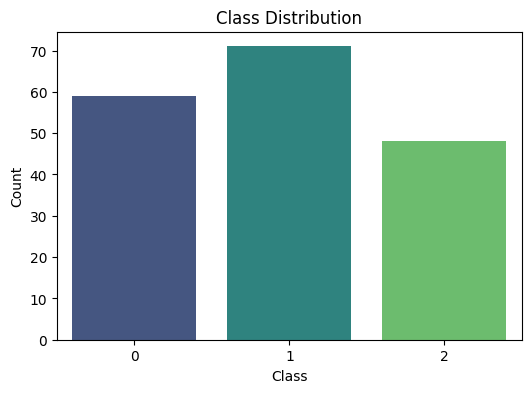

In [12]:
# 1. Sınıf dağılımını incele
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

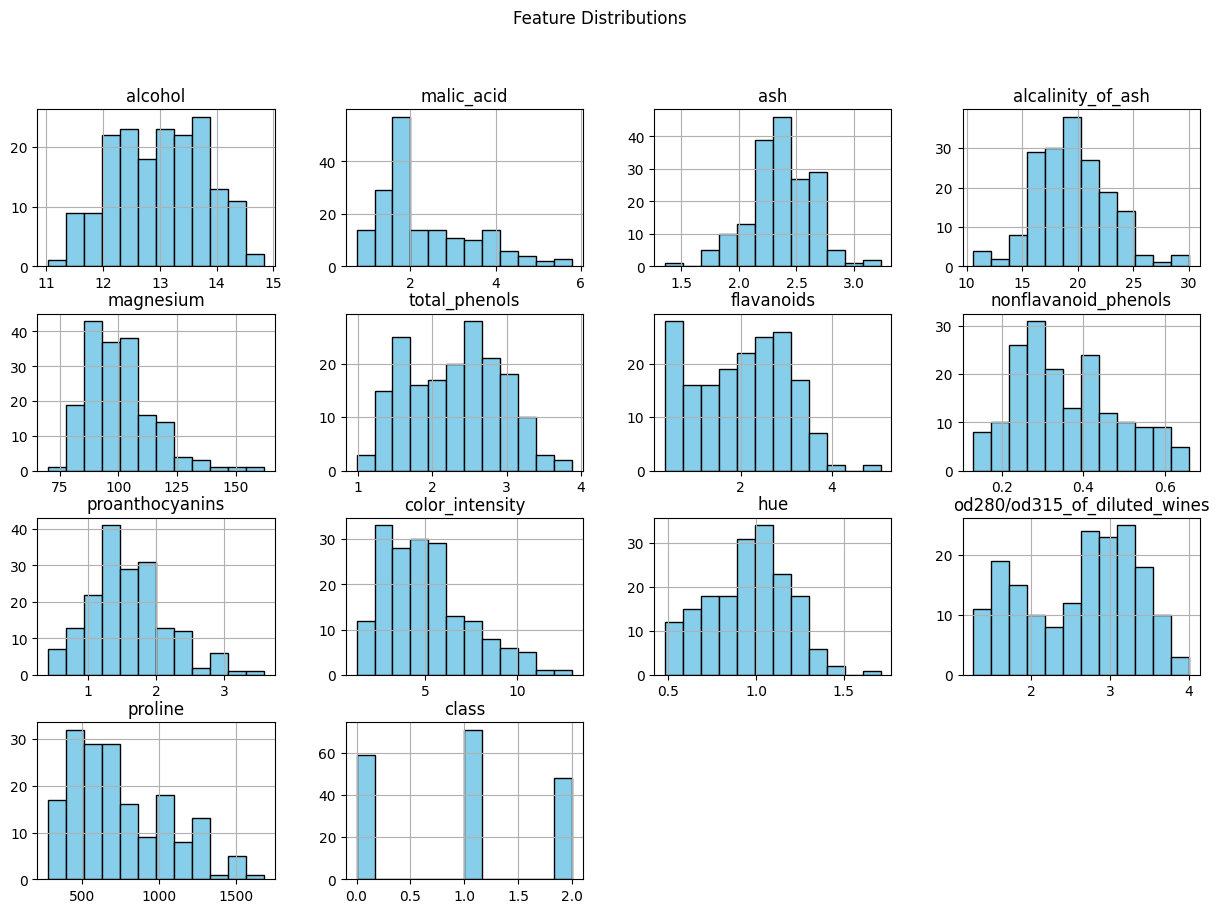

In [13]:
# 2. Özelliklerin dağılımını incele
df.hist(bins=12, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()

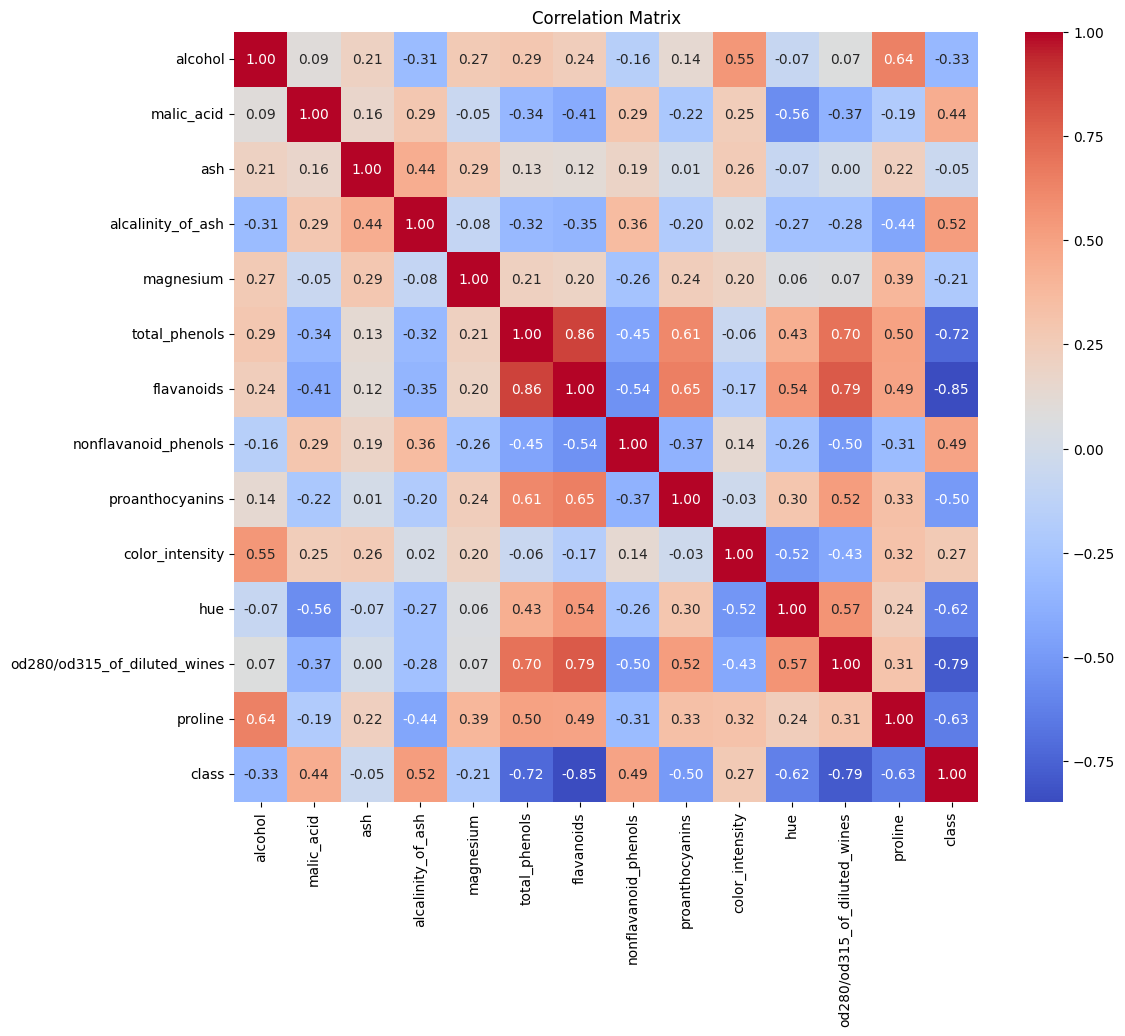

In [14]:
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [16]:
# Veri Ön İşleme
X = df.drop('class', axis=1)
y = df['class']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## KNN Model

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [20]:
y_pred = knn.predict(X_test_scaled)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [22]:
print("\nModel Accuracy: ", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Model Accuracy:  0.9722222222222222

Confusion Matrix:
[[12  0  0]
 [ 0 13  1]
 [ 0  0 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.96        14
           2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



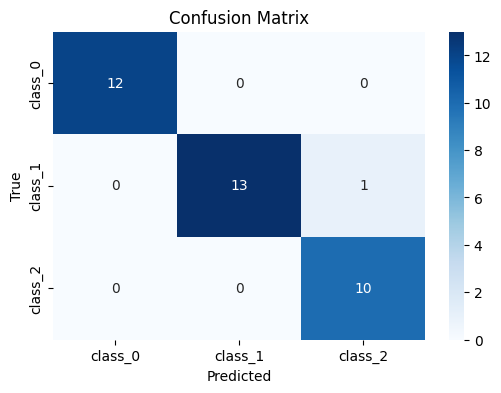

In [23]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=wine_data.target_names, yticklabels=wine_data.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [28]:
y_pred2 = rf_model.predict(X_test_scaled)

In [29]:
rf_accuracy = accuracy_score(y_test, y_pred2)
rf_conf_matrix = confusion_matrix(y_test, y_pred2)
rf_class_report = classification_report(y_test, y_pred2)

In [30]:
print("\nRandom Forest Model Accuracy: ", rf_accuracy)
print("\nRandom Forest Confusion Matrix:")
print(rf_conf_matrix)
print("\nRandom Forest Classification Report:")
print(rf_class_report)


Random Forest Model Accuracy:  1.0

Random Forest Confusion Matrix:
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



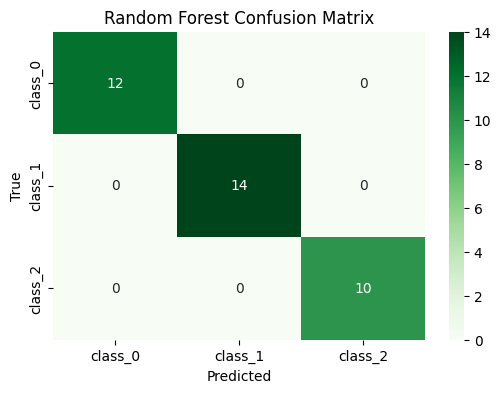

In [31]:
# Konfizyon Matrisi Görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=wine_data.target_names, yticklabels=wine_data.target_names)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [32]:
# Özellik Önem Skoru (Feature Importance)
feature_importances = pd.Series(rf_model.feature_importances_, index=wine_data.feature_names).sort_values(ascending=False)

C:\Users\csm_h\AppData\Local\Temp\ipykernel_22728\2404608676.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


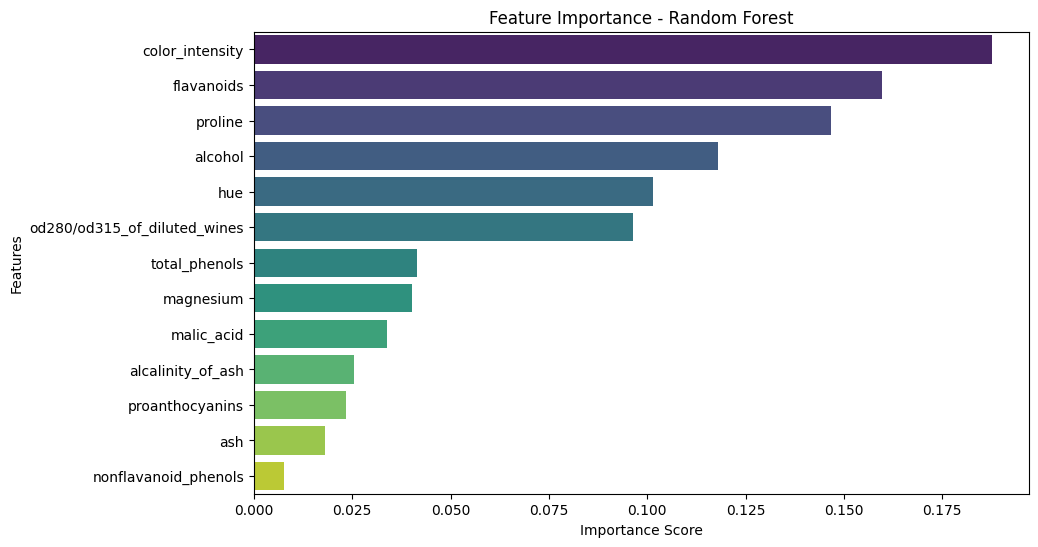

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

## LightGBM

In [34]:
from lightgbm import LGBMClassifier

In [35]:
lgbm_model = LGBMClassifier(n_estimators=100, random_state=42)
lgbm_model.fit(X_train_scaled, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 502
[LightGBM] [Info] Number of data points in the train set: 142, number of used features: 13
[LightGBM] [Info] Start training from score -1.105679
[LightGBM] [Info] Start training from score -0.912776
[LightGBM] [Info] Start training from score -1.318241
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

LGBMClassifier(random_state=42)

In [36]:
y_pred3 = lgbm_model.predict(X_test_scaled)

In [37]:
lgbm_accuracy = accuracy_score(y_test, y_pred3)
lgbm_conf_matrix = confusion_matrix(y_test, y_pred3)
lgbm_class_report = classification_report(y_test, y_pred3)

In [38]:
print("\nLightGBM Model Accuracy: ", lgbm_accuracy)
print("\nLightGBM Confusion Matrix:")
print(lgbm_conf_matrix)
print("\nLightGBM Classification Report:")
print(lgbm_class_report)


LightGBM Model Accuracy:  1.0

LightGBM Confusion Matrix:
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]

LightGBM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



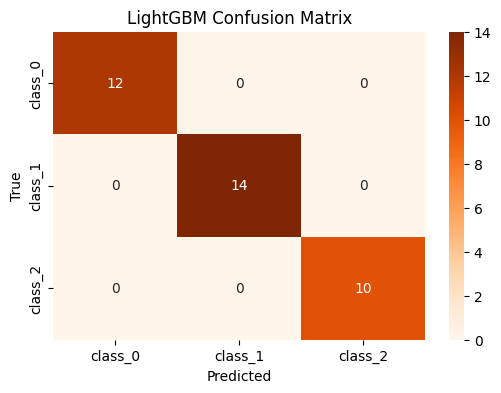

In [39]:
plt.figure(figsize=(6, 4))
sns.heatmap(lgbm_conf_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=wine_data.target_names, yticklabels=wine_data.target_names)
plt.title('LightGBM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

C:\Users\csm_h\AppData\Local\Temp\ipykernel_22728\2898712003.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lgbm_feature_importances, y=lgbm_feature_importances.index, palette='coolwarm')


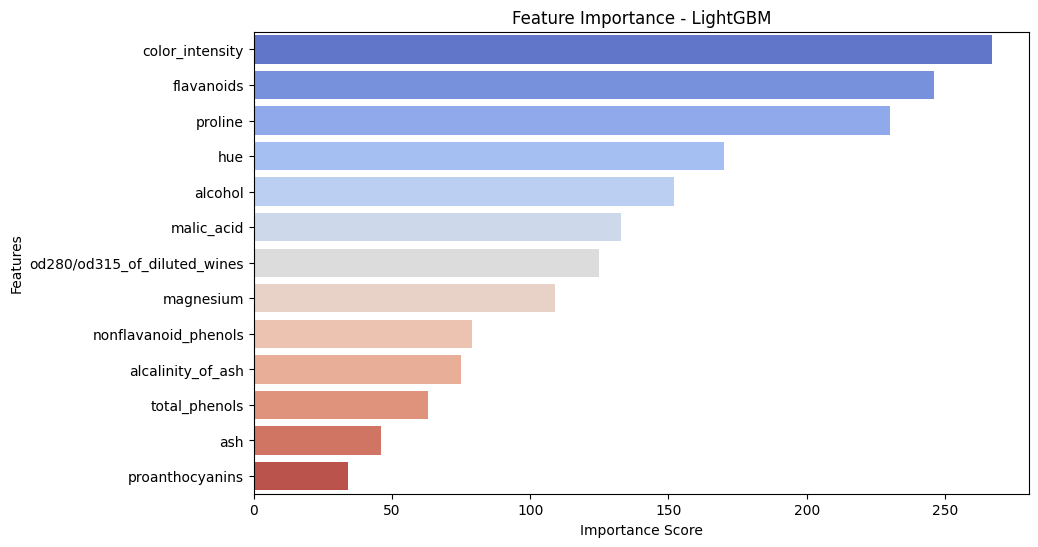

In [40]:
lgbm_feature_importances = pd.Series(lgbm_model.feature_importances_, index=wine_data.feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=lgbm_feature_importances, y=lgbm_feature_importances.index, palette='coolwarm')
plt.title('Feature Importance - LightGBM')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

Comparing

In [41]:
print("KNN Accuracy: ", accuracy)
print("Random Forest Accuracy: ", rf_accuracy)
print("LightGBM Accuracy: ", lgbm_accuracy)

KNN Accuracy:  0.9722222222222222
Random Forest Accuracy:  1.0
LightGBM Accuracy:  1.0
